<a href="https://colab.research.google.com/github/rahul70245/Market-Segmentation-EV-2-Wheeler-India/blob/main/Market_Segmentation_EV_2_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [ ]:

df= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/market segmentation 2nd project.xlsx')
df

,ID,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W),Review
0,1,Ampere Magnus EX,104758,121,53,90,7.0,1200,good
1,2,Ampere Magnus Pro,66053,45,25,94,10.0,250,bad
2,3,Ampere REO,61993,45,25,88,10.0,250,ok
3,4,Ampere Zeal,96544,120,53,80,7.0,1200,ok
4,5,Ather 450X,135489,111,90,108,8.0,3000,good
...,...,...,...,...,...,...,...,...,...
2020,2021,Orxa Mantis,360000,221,135,182,5.0,7500,good
2021,2022,power ev-p sport,220000,210,85,115,6.0,4500,ok
2022,2023,TVS X,270000,140,105,120,4.5,4400,good
2023,2024,Birla DMG,315000,150,100,120,4.0,1700,bad


**DATA EXPLORING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2025 non-null   int64  
 1   Model Name                   2025 non-null   object 
 2   Price                        2025 non-null   int64  
 3   Riding Range (km)            2025 non-null   int64  
 4   Top Speed (kmph)             2025 non-null   int64  
 5   Weight (kg)                  2025 non-null   int64  
 6   Battery Charging Time (hrs)  2025 non-null   float64
 7   Power (W)                    2025 non-null   int64  
 8   Review                       2025 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 142.5+ KB


In [ ]:
df.describe()

,ID,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W)
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,1013.000000,123573.155556,113.266667,58.600000,105.644444,5.377778,1891.111111
std,584.711467,81585.505218,47.222489,32.348812,34.010461,1.564411,1994.491550
min,1.000000,51094.000000,45.000000,25.000000,59.000000,3.000000,250.000000
25%,507.000000,73124.000000,85.000000,25.000000,80.000000,4.000000,250.000000
50%,1013.000000,96544.000000,100.000000,53.000000,94.000000,5.000000,1200.000000
75%,1519.000000,134975.000000,140.000000,78.000000,125.000000,6.000000,3000.000000
max,2025.000000,400000.000000,225.000000,150.000000,197.000000,10.000000,9000.000000


In [ ]:
# checking null entries

df.isnull().sum()

ID                             0
Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Power (W)                      0
Review                         0
dtype: int64

In [ ]:
# checking duplicacy

df.duplicated().sum()

0

**EXPLORATORY DATA ANALYSIS**

In [ ]:
print(list(df.drop(['Price','Review','ID','Model Name'], axis=1).columns))


['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)']


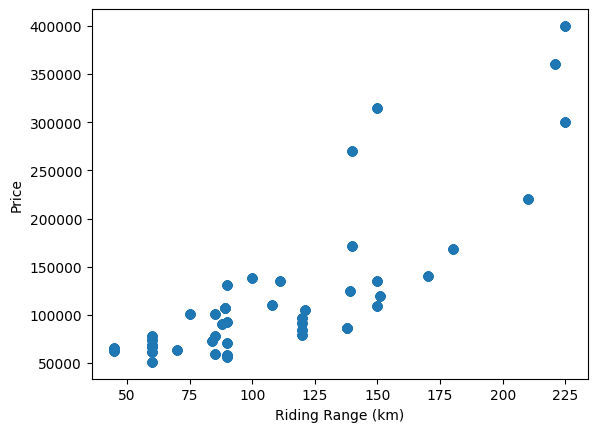

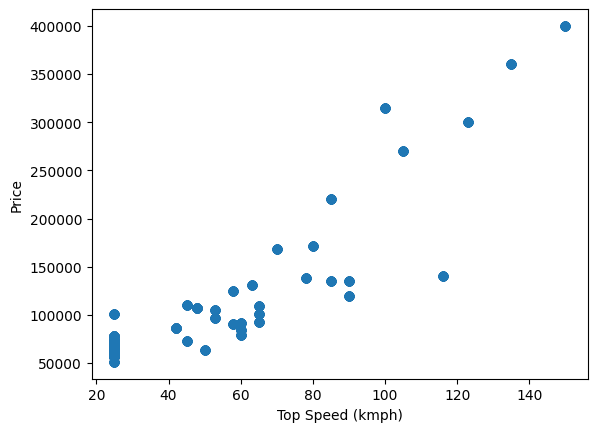

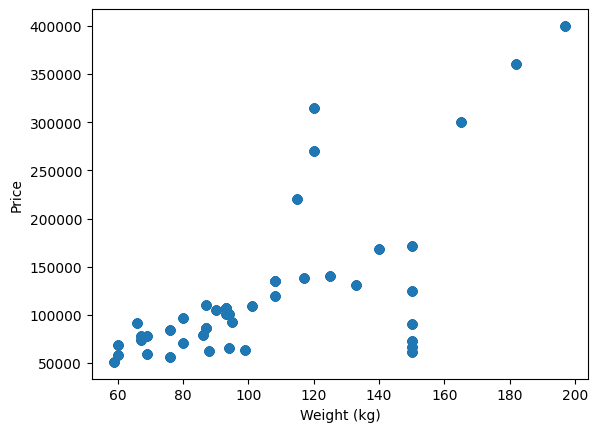

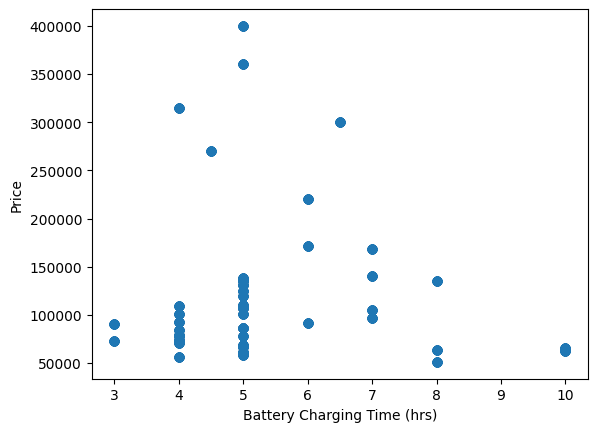

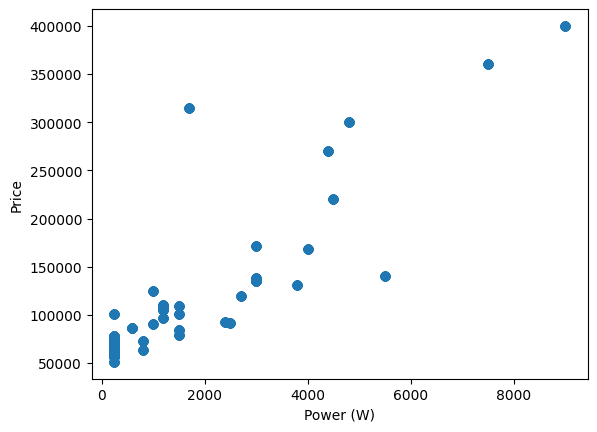

In [ ]:
# scatter plot

y=list(df.drop(['Price','Review','ID','Model Name'], axis=1).columns)
x=list(df['Price'])
for i in y:
  plt.figure()
  plt.scatter(df[i],x)
  plt.xlabel(i)
  plt.ylabel('Price')
  plt.show()

<ipython-input-260-077344726e6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


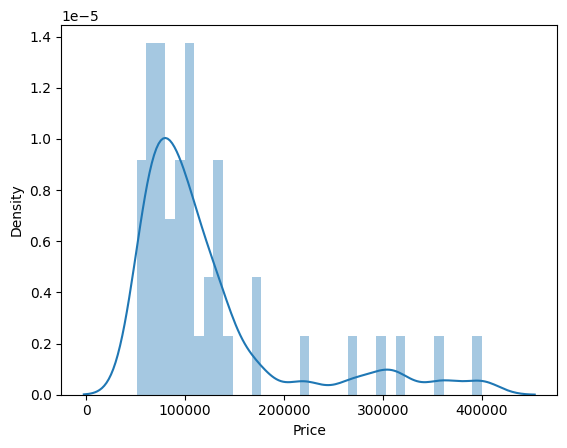

<ipython-input-260-077344726e6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


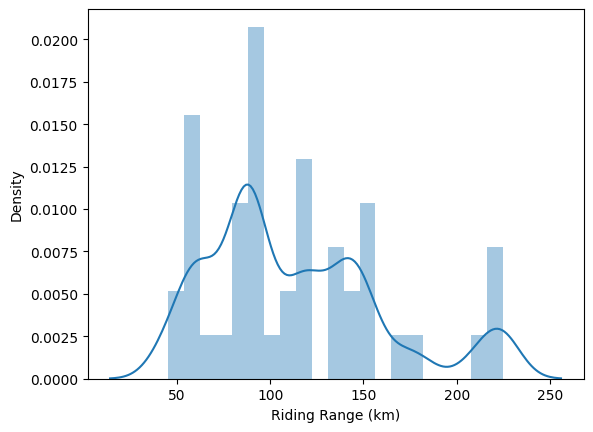

<ipython-input-260-077344726e6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


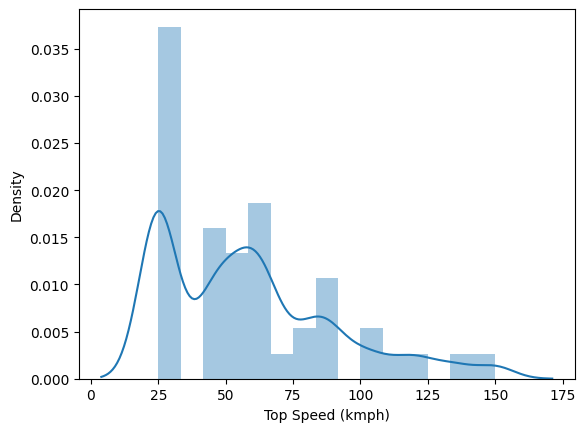

<ipython-input-260-077344726e6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


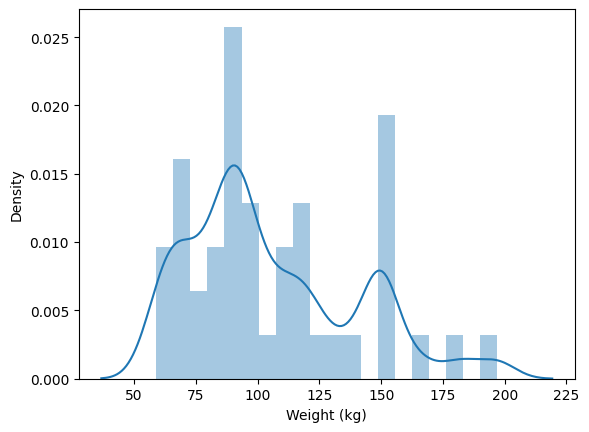

<ipython-input-260-077344726e6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


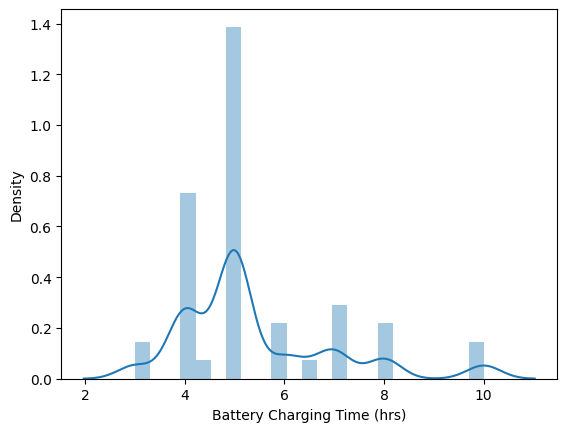

<ipython-input-260-077344726e6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


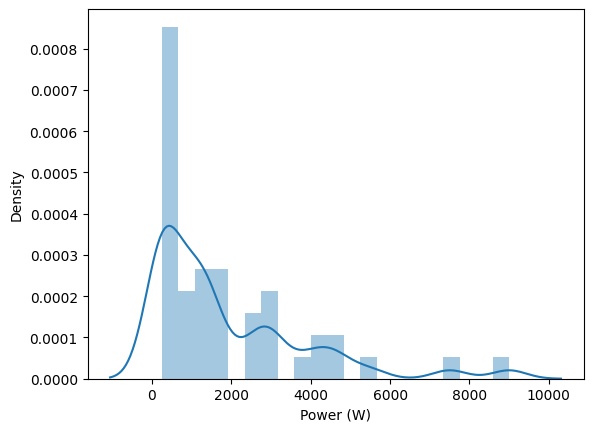

In [ ]:
# distribution, skewness of numerical features

n=list(df.drop(['ID'],axis=1).describe().columns)

for col in n:
  plt.figure()
  sns.distplot(df[col])
  plt.show()

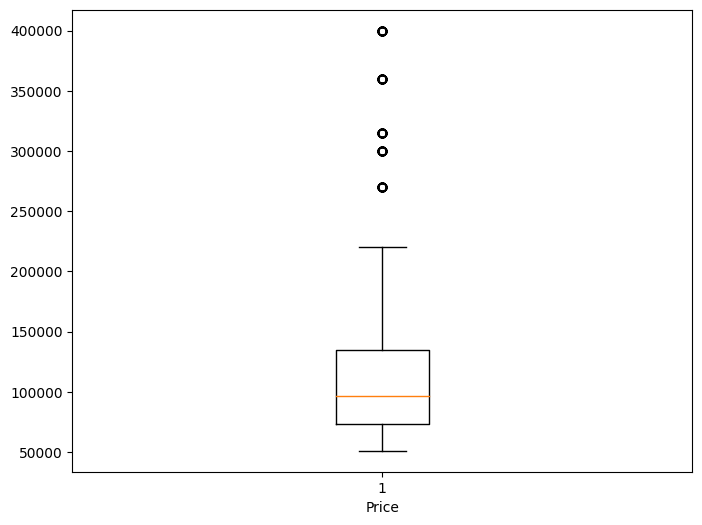

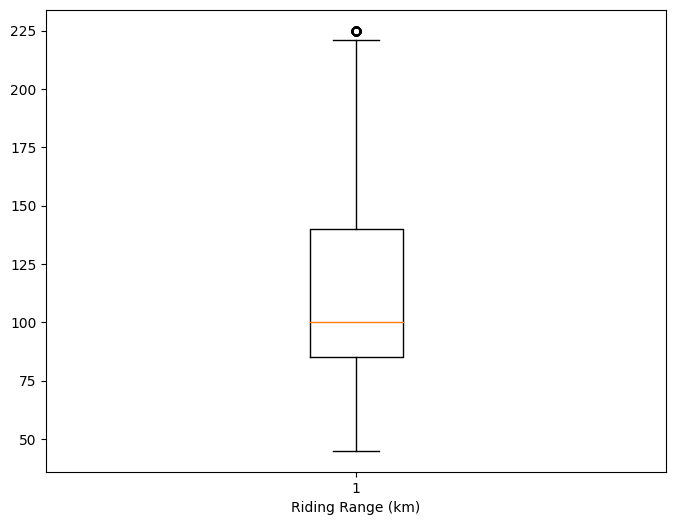

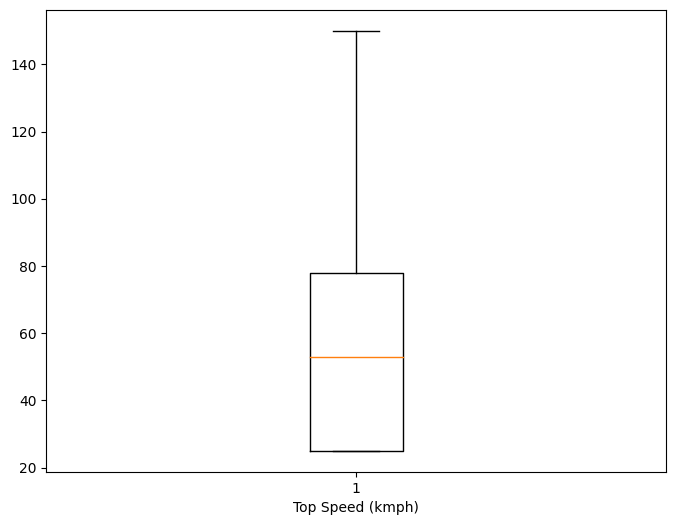

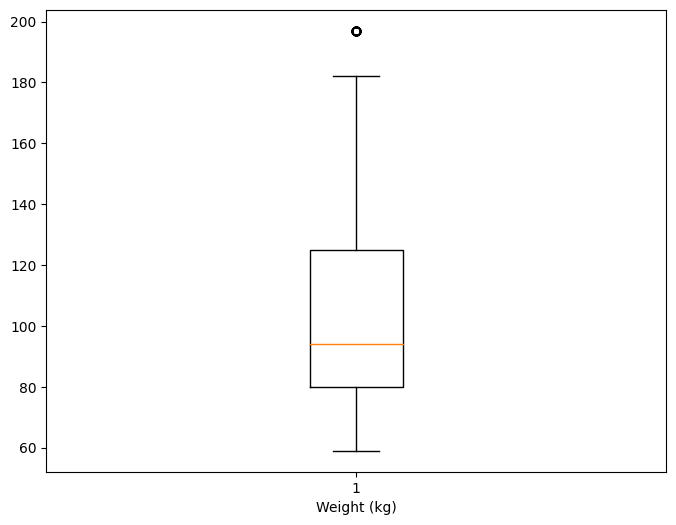

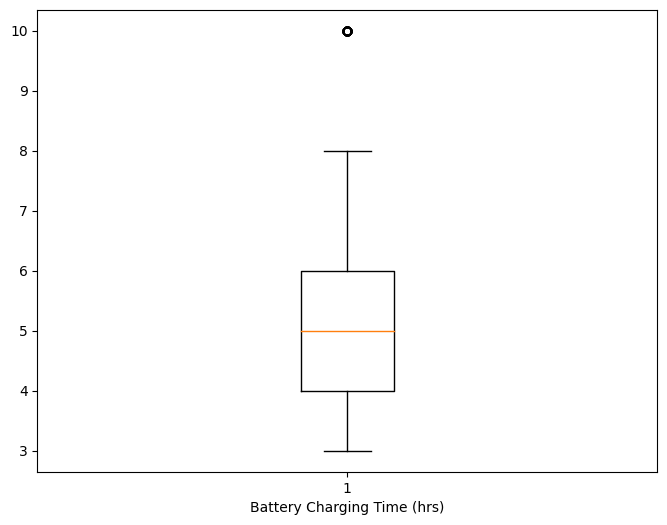

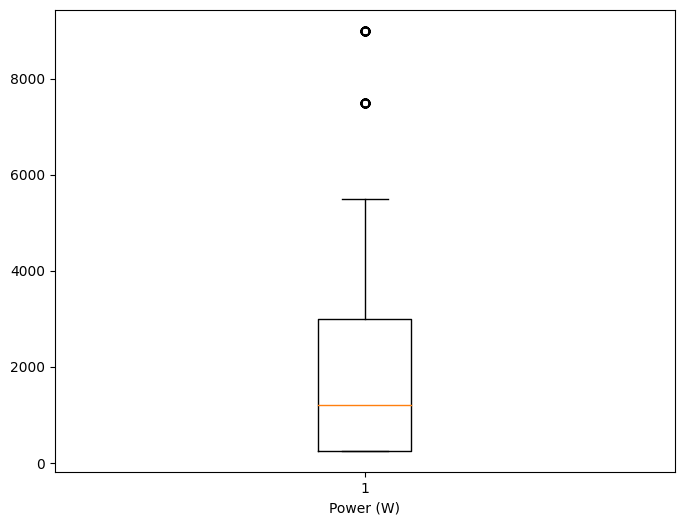

In [ ]:
# checking outlier

for col in n:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()

outlier is present but we cannot ignore or remove them as vehicles price or top speed or any other variable can be also very high but we will use standardization after splitting which will reduce the influence of outliers

In [ ]:
# categorical columns

In [ ]:
df['Review'].value_counts()

Review
good    810
ok      720
bad     495
Name: count, dtype: int64

<Axes: ylabel='count'>

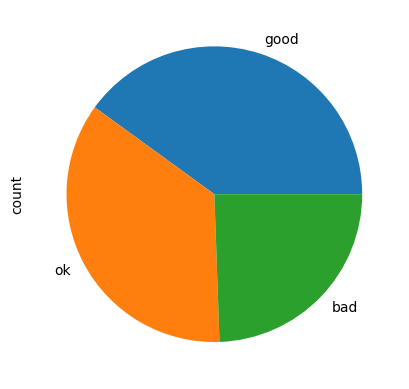

In [ ]:
df['Review'].value_counts().plot(kind='pie')

Data Preprocessing

In [ ]:
df['bad_review']=np.where(df['Review']=='bad',1,0)
df['ok_review']=np.where(df['Review']=='ok',1,0)
df['good_review']=np.where(df['Review']=='good',1,0)

In [ ]:
df.head()

,ID,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W),Review,bad_review,ok_review,good_review
0,1,Ampere Magnus EX,104758,121,53,90,7.0,1200,good,0,0,1
1,2,Ampere Magnus Pro,66053,45,25,94,10.0,250,bad,1,0,0
2,3,Ampere REO,61993,45,25,88,10.0,250,ok,0,1,0
3,4,Ampere Zeal,96544,120,53,80,7.0,1200,ok,0,1,0
4,5,Ather 450X,135489,111,90,108,8.0,3000,good,0,0,1


In [ ]:
# splitting the datset

In [ ]:
# first is features with price for PRICING SEGMENTATION except review field

dfp=df[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)', 'Price']]
dfp.head()

,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W),Price
0,121,53,90,7.0,1200,104758
1,45,25,94,10.0,250,66053
2,45,25,88,10.0,250,61993
3,120,53,80,7.0,1200,96544
4,111,90,108,8.0,3000,135489


<Axes: >

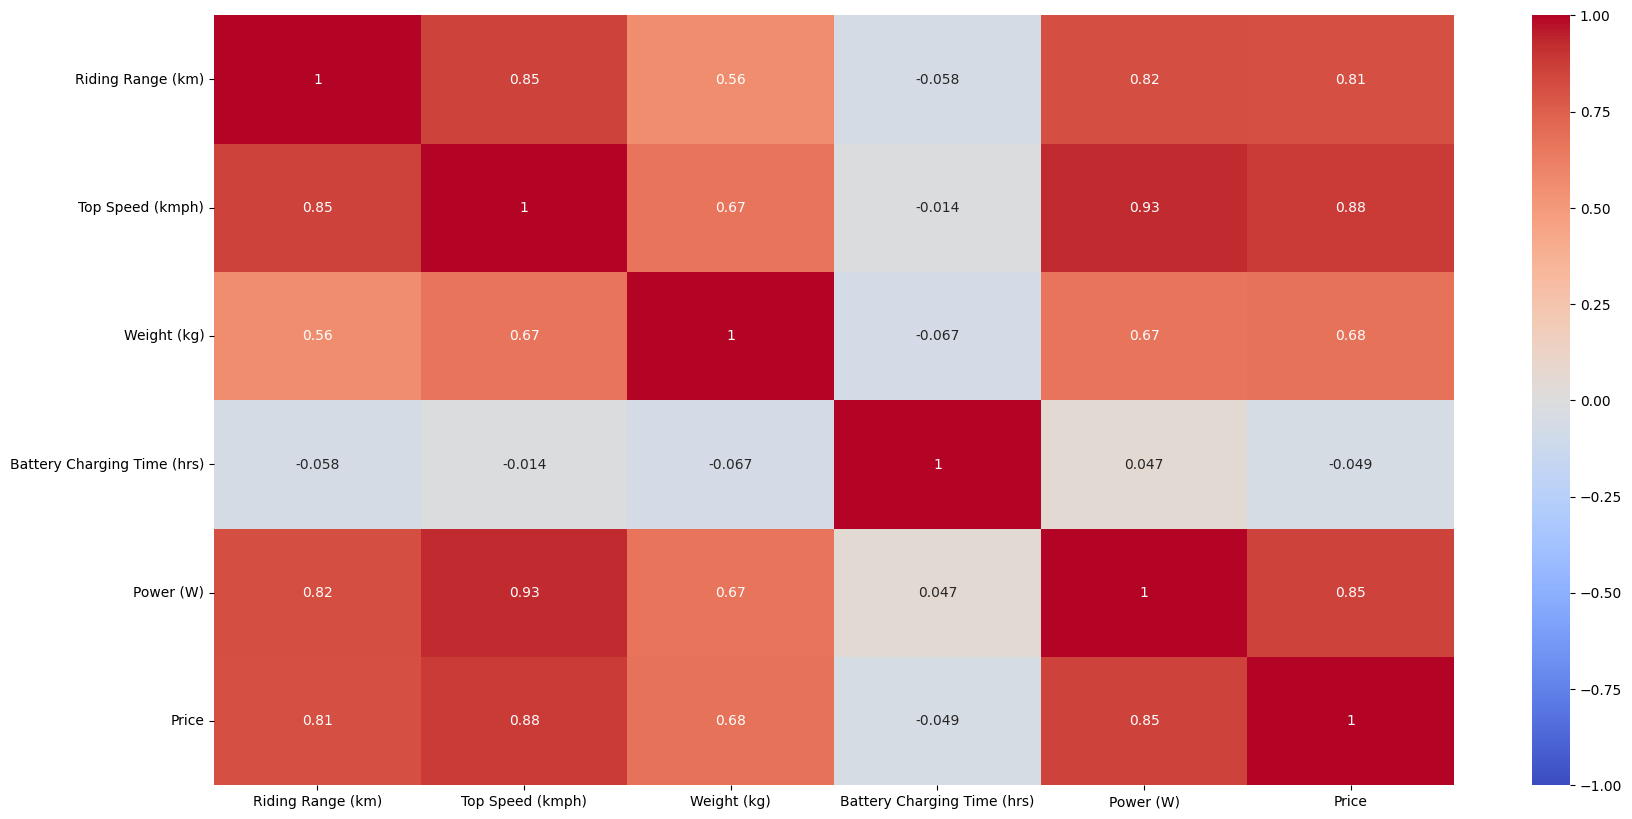

In [ ]:
# correlation

plt.figure(figsize=(20,10))
sns.heatmap(dfp.corr(), annot=True,vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
# second is same features with review for BEHAVIOURAL SEGMENTATATION except price field

dfr=df[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)', 'bad_review', 'ok_review', 'good_review']]
dfr.head()

,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W),bad_review,ok_review,good_review
0,121,53,90,7.0,1200,0,0,1
1,45,25,94,10.0,250,1,0,0
2,45,25,88,10.0,250,0,1,0
3,120,53,80,7.0,1200,0,1,0
4,111,90,108,8.0,3000,0,0,1


<Axes: >

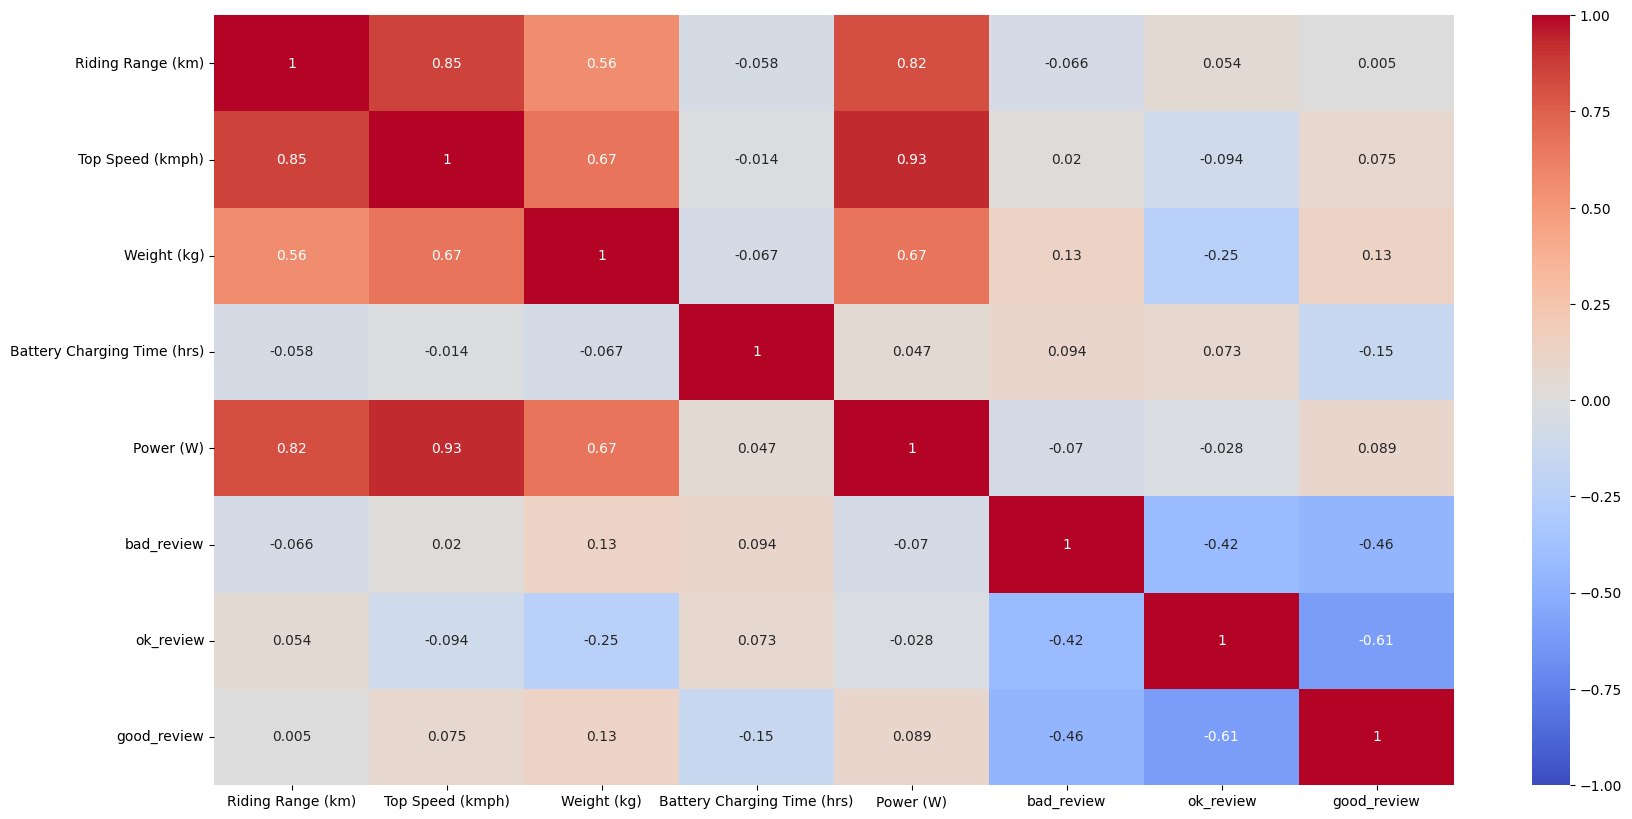

In [ ]:
# correlation

plt.figure(figsize=(20,10))
sns.heatmap(dfr.corr(), annot=True,vmin=-1, vmax=1, cmap='coolwarm')

correlated data as feilds are somewhat dependent on each other

# **PRICING SEGMENTATION**

In [ ]:
dfp.head()

,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W),Price
0,121,53,90,7.0,1200,104758
1,45,25,94,10.0,250,66053
2,45,25,88,10.0,250,61993
3,120,53,80,7.0,1200,96544
4,111,90,108,8.0,3000,135489


In [ ]:
# not splitting the data into training and testing because data is in small qty

FEATURE SCALLING

In [ ]:
# using standardization as not maximum features have normal distribution and it will reduce influence of otlier also

scaler= StandardScaler()
dfp=scaler.fit_transform(dfp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

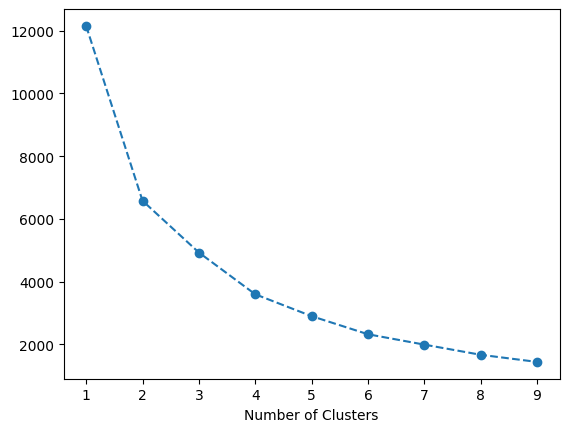

In [ ]:
# to defining k or number of clusters


clustering_score = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(dfp)
    clustering_score.append(kmeans.inertia_)

plt.plot(range(1,10), clustering_score, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.show()

k=3 as there is less fall after that

TRAINING THE FIRST MODEL

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(dfp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [ ]:
labels= kmeans.labels_

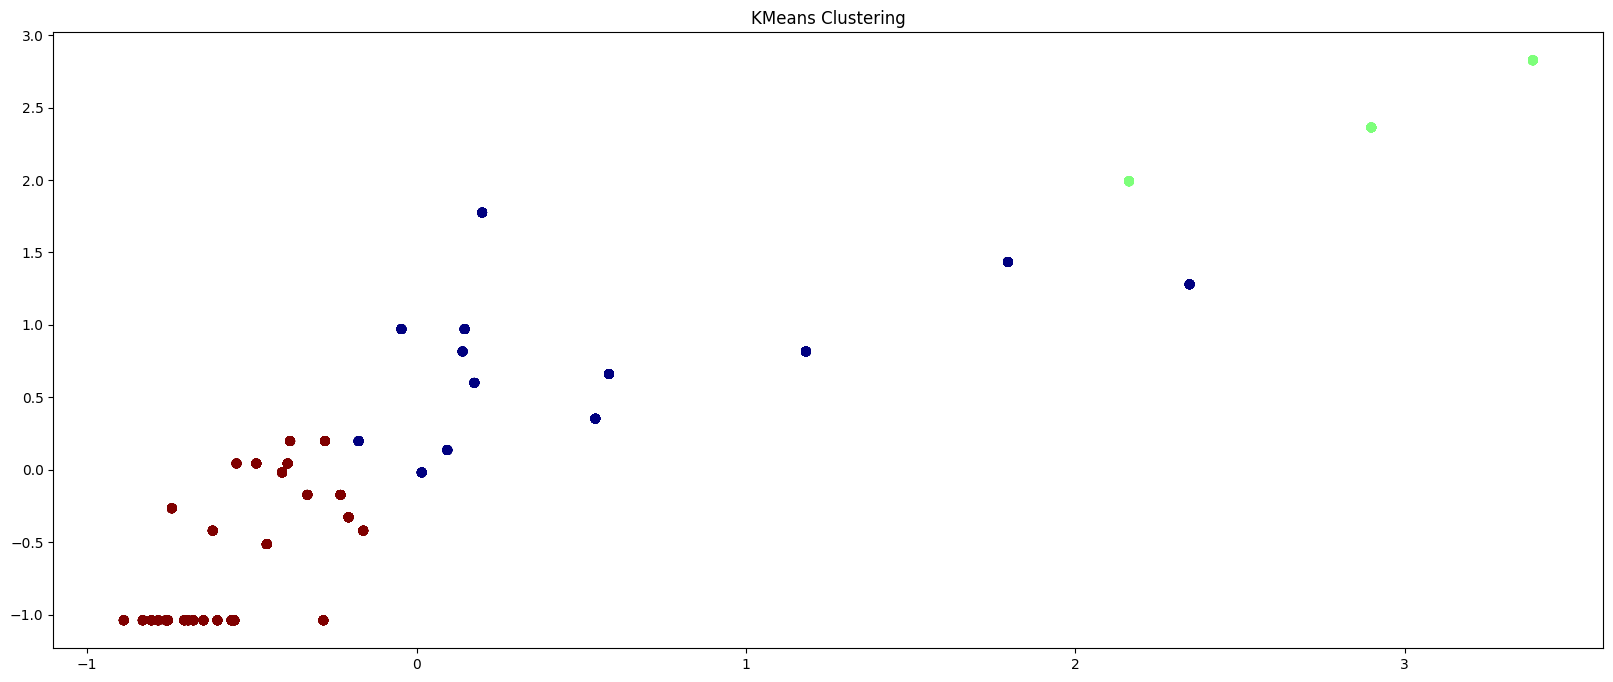

In [ ]:
# Plotting the clusters
# converting dfp as it is an array

plt.figure(figsize=(20, 8))
plt.scatter( pd.DataFrame(dfp)[5],pd.DataFrame(dfp)[1] , c=labels, cmap= 'jet')
plt.title('KMeans Clustering')
plt.show()

# **BEHAVIOURAL SEGMENTATION**





In [ ]:
dfr.head()

,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Power (W),bad_review,ok_review,good_review
0,121,53,90,7.0,1200,0,0,1
1,45,25,94,10.0,250,1,0,0
2,45,25,88,10.0,250,0,1,0
3,120,53,80,7.0,1200,0,1,0
4,111,90,108,8.0,3000,0,0,1


In [ ]:
# not splitting the data into training and testing because data is in small qty

FEATURE SCALING

In [ ]:
# using standardization as not maximum features have normal distribution and it will reduce influence of otlier also

scaler= StandardScaler()
dfr[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)']]=scaler.fit_transform(dfr[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)']])

<ipython-input-281-496c2f5878ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)']]=scaler.fit_transform(dfr[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Power (W)']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

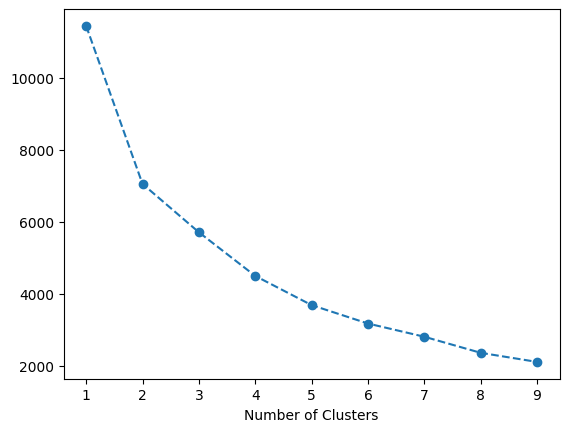

In [ ]:
# to defining k or number of clusters


clustering_score = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(dfr)
    clustering_score.append(kmeans.inertia_)

plt.plot(range(1,10), clustering_score, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.show()

k=3 as less fall is after that

TRAINING THE SECOND MODEL

In [ ]:
kmeans1 = KMeans(n_clusters=3, random_state=1)
kmeans1.fit(dfr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [ ]:
labels1= kmeans.labels_

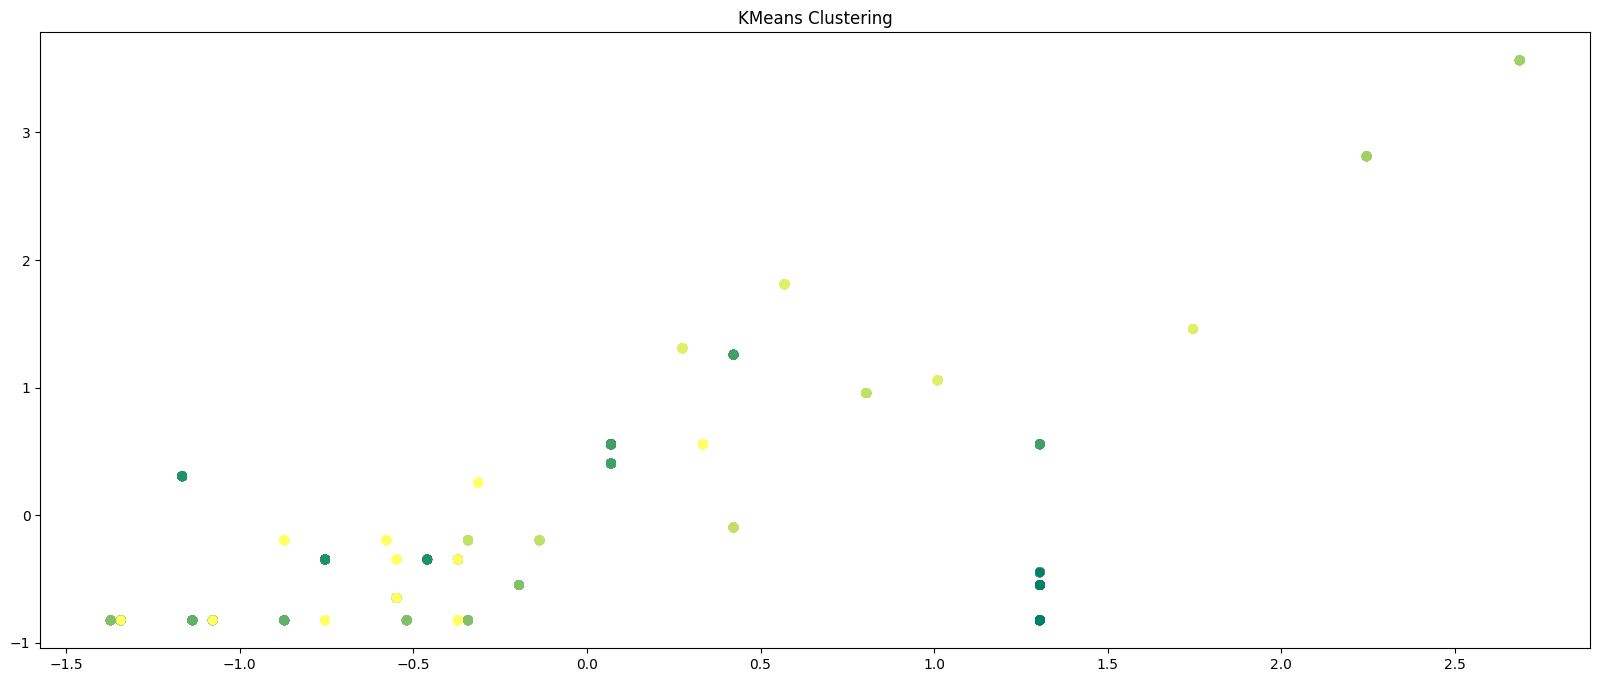

In [ ]:
# Plotting the clusters
# converting dfr as it is an array

x=['Weight (kg)']
y=['Power (W)']
plt.figure(figsize=(20, 8))
plt.scatter( dfr[x],dfr[y] , c=labels1, cmap= 'summer')
plt.title('KMeans Clustering')
plt.show()